<a href="https://colab.research.google.com/github/marianagoncalvesap/ethanolbimaster/blob/main/RedesRecorrentesEtanolAnidro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network - LSTM


## Parte 1 - Preprocessamento de Dados

### Importar as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#semente inicial
seed=10
import random
np.random.seed(seed) 
random.seed(seed)
import tensorflow
tensorflow.random.set_seed(seed)

### Importar a base de dados

In [2]:
dataset_train = pd.read_csv('CEPEA_Etanol Anidro.csv',sep=';')
training_set = dataset_train.iloc[0:224, 1:2].values #só coluna da série em si

In [3]:
pd.DataFrame(training_set).tail()

,0
219,24.969
220,29.806
221,27.742
222,32.195
223,33.353


In [4]:
dataset_train.describe()

,À vista R$,À vista US$
count,224.000000,224.000000
mean,9.989403,0.489416
std,8.248938,0.164199
min,0.390500,0.134400
25%,0.877800,0.392225
50%,12.397500,0.486650
75%,16.330500,0.591600
max,33.353000,1.495000


In [5]:
dataset_train.head()

,Data,À vista R$,À vista US$
0,28/11/2002,0.7651,0.2137
1,30/12/2002,0.7824,0.2145
2,30/01/2003,0.9237,0.2686
3,27/02/2003,1.0260,0.2856
4,28/03/2003,10.0730,0.2918


In [6]:
dataset_train.shape

(225, 3)

### gráfico da série temporal

In [7]:
training_set[0:5,:]

array([[ 0.7651],
       [ 0.7824],
       [ 0.9237],
       [ 1.026 ],
       [10.073 ]])

In [8]:
dataset_train.head()

,Data,À vista R$,À vista US$
0,28/11/2002,0.7651,0.2137
1,30/12/2002,0.7824,0.2145
2,30/01/2003,0.9237,0.2686
3,27/02/2003,1.0260,0.2856
4,28/03/2003,10.0730,0.2918


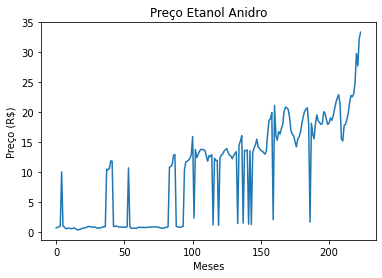

In [9]:
plt.plot(training_set)
plt.xlabel("Meses")
plt.ylabel("Preço (R$)")
plt.title("Preço Etanol Anidro")
plt.show()

In [10]:
training_set = pd.DataFrame(training_set)

In [11]:
training_set.isnull().sum()

0    0
dtype: int64

In [12]:
training_set.interpolate(method="linear",inplace=True)

In [13]:
training_set.isnull().sum()

0    0
dtype: int64

### Normalização

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Criar a estrutura de dados com janela 10 e output 1

In [15]:
window = 10
trainSize = len(training_set_scaled)
X_train = []
y_train = []
for i in range(window, trainSize):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
X_train[0:5,:]

array([[0.01136443, 0.01188927, 0.01617596, 0.01927948, 0.29374289,
        0.0184088 , 0.01502617, 0.00771483, 0.00593705, 0.00967463],
       [0.01188927, 0.01617596, 0.01927948, 0.29374289, 0.0184088 ,
        0.01502617, 0.00771483, 0.00593705, 0.00967463, 0.0084581 ],
       [0.01617596, 0.01927948, 0.29374289, 0.0184088 , 0.01502617,
        0.00771483, 0.00593705, 0.00967463, 0.0084581 , 0.00614941],
       [0.01927948, 0.29374289, 0.0184088 , 0.01502617, 0.00771483,
        0.00593705, 0.00967463, 0.0084581 , 0.00614941, 0.00788168],
       [0.29374289, 0.0184088 , 0.01502617, 0.00771483, 0.00593705,
        0.00967463, 0.0084581 , 0.00614941, 0.00788168, 0.00965643]])

In [17]:
y_train[0:5]

array([0.0084581 , 0.00614941, 0.00788168, 0.00965643, 0.00736898])

In [18]:
from sklearn.model_selection import  train_test_split
input_train,input_test,output_train,output_test = train_test_split(X_train,y_train,test_size=0.2)

### Reshaping

In [19]:
input_train.shape

(171, 10)

In [20]:
input_train = np.reshape(input_train, (input_train.shape[0], input_train.shape[1], 1))

In [21]:
input_train.shape

(171, 10, 1)

## Parte 2 - Construção da RNN

### Bibliotecas necessárias

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Construção da Rede completa

In [23]:
# Initicializar a RNN
regressor = Sequential()
 
# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (input_train.shape[1], 1)))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 80)            57920     
                                                                 
 dropout_1 (Dropout)         (None, 10, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                26200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

### Treinamento

In [24]:
input_train


array([[[0.0148047 ],
        [0.01445582],
        [0.01421009],
        ...,
        [0.31355328],
        [0.01496549],
        [0.00863405]],

       [[0.0084581 ],
        [0.00614941],
        [0.00788168],
        ...,
        [0.00219644],
        [0.0045931 ],
        [0.00723246]],

       [[0.01502617],
        [0.00771483],
        [0.00593705],
        ...,
        [0.00965643],
        [0.00736898],
        [0.00185362]],

       ...,

       [[0.00185362],
        [0.        ],
        [0.00219644],
        ...,
        [0.0116496 ],
        [0.01562685],
        [0.01785059]],

       [[0.41130072],
        [0.39136898],
        [0.37805082],
        ...,
        [0.39552522],
        [0.03183921],
        [0.42989761]],

       [[0.00967463],
        [0.0084581 ],
        [0.00614941],
        ...,
        [0.        ],
        [0.00219644],
        [0.0045931 ]]])

In [25]:
output_train

array([0.00843383, 0.00874024, 0.        , 0.01419795, 0.0155237 ,
       0.39855897, 0.59796739, 0.40514221, 0.53368221, 0.45425863,
       0.00219644, 1.        , 0.55139932, 0.47136898, 0.01392491,
       0.00864922, 0.01733485, 0.46023512, 0.55558589, 0.60919226,
       0.42989761, 0.53386424, 0.40599166, 0.37031475, 0.45001138,
       0.44621919, 0.59047402, 0.01584831, 0.38721274, 0.31355328,
       0.42037163, 0.00847327, 0.4305347 , 0.68063709, 0.33145241,
       0.37610922, 0.45908229, 0.36279105, 0.5362609 , 0.02898749,
       0.00929845, 0.01073948, 0.0116132 , 0.01421009, 0.89239287,
       0.3604854 , 0.61034509, 0.37805082, 0.56095563, 0.34753129,
       0.40050057, 0.48335229, 0.40147137, 0.47252181, 0.01355783,
       0.01361244, 0.01325142, 0.0174744 , 0.36206295, 0.00819719,
       0.01660978, 0.01266894, 0.68749336, 0.01387637, 0.40496018,
       0.01397345, 0.01785059, 0.01619113, 0.30372393, 0.63567691,
       0.31091392, 0.00965643, 0.01120061, 0.55807357, 0.53389

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
es = EarlyStopping(patience=50)
rlr = ReduceLROnPlateau(monitor='val_loss', patience=30)
mc = ModelCheckpoint(filepath='best.h5', save_best_only=True) # se quiser manter um tracking da época e do erro: 'best_{epoch:03d}-{val_loss:.4f}.h5'

history = regressor.fit(input_train, output_train, epochs = 250, batch_size = 32, validation_split=0.1, callbacks=[rlr, es, mc])

Epoch 1/250
5/5 [==============================] - 7s 411ms/step - loss: 0.1200 - val_loss: 0.0433 - lr: 0.0010
Epoch 2/250
5/5 [==============================] - 0s 33ms/step - loss: 0.0391 - val_loss: 0.0436 - lr: 0.0010
Epoch 3/250
5/5 [==============================] - 0s 43ms/step - loss: 0.0329 - val_loss: 0.0257 - lr: 0.0010
Epoch 4/250
5/5 [==============================] - 0s 32ms/step - loss: 0.0290 - val_loss: 0.0261 - lr: 0.0010
Epoch 5/250
5/5 [==============================] - 0s 41ms/step - loss: 0.0234 - val_loss: 0.0209 - lr: 0.0010
Epoch 6/250
5/5 [==============================] - 0s 39ms/step - loss: 0.0238 - val_loss: 0.0205 - lr: 0.0010
Epoch 7/250
5/5 [==============================] - 0s 31ms/step - loss: 0.0225 - val_loss: 0.0212 - lr: 0.0010
Epoch 8/250
5/5 [==============================] - 0s 38ms/step - loss: 0.0217 - val_loss: 0.0188 - lr: 0.0010
Epoch 9/250
5/5 [==============================] - 0s 39ms/step - loss: 0.0187 - val_loss: 0.0185 - lr: 0.0010


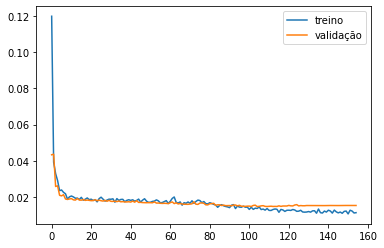

In [27]:
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.legend();

## Parte 3 - Fazer as previsões e analisar os resultados

### Fazer as previsões

In [28]:
input_test.shape

(43, 10)

In [29]:
input_test = np.reshape(input_test, (input_test.shape[0], input_test.shape[1], 1))

In [30]:
input_test.shape

(43, 10, 1)

In [31]:
regressor.load_weights('best.h5')
predicted_anydrous_price = regressor.predict(input_test)
predicted_anydrous_price = sc.inverse_transform(predicted_anydrous_price)

### Visualizar os resultados de treino e teste

In [32]:
predicted_train = regressor.predict(input_train)
predicted_train = sc.inverse_transform(predicted_train)

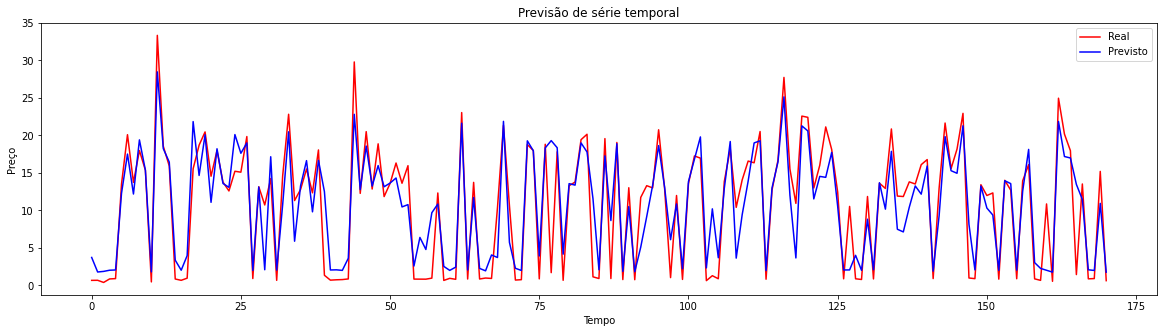

In [33]:
plt.figure(figsize=(20,5))
output_train_denorm = sc.inverse_transform(np.reshape(output_train, (output_train.shape[0], 1)))
plt.plot(output_train_denorm, color = 'red', label = 'Real')
plt.plot(predicted_train, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

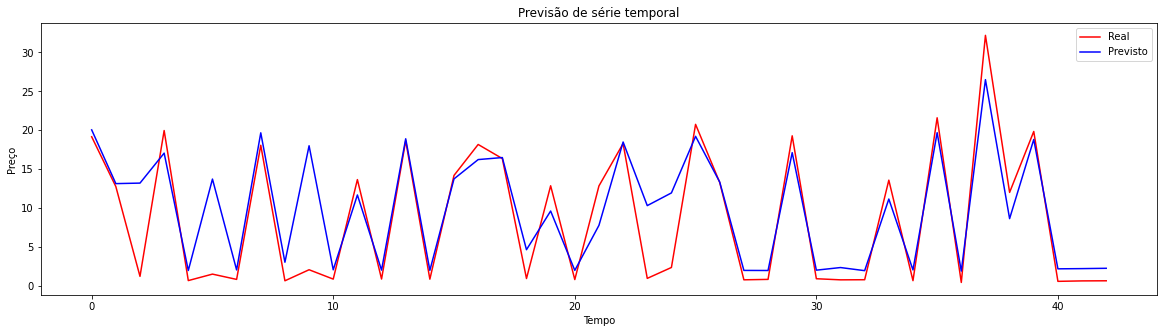

In [34]:
plt.figure(figsize=(20,5))
output_test_denorm = sc.inverse_transform(np.reshape(output_test, (output_test.shape[0], 1)))
plt.plot(output_test_denorm, color = 'red', label = 'Real')
plt.plot(predicted_anydrous_price, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

## Parte 4 - Métricas de avaliação

In [35]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(output_test_denorm, predicted_anydrous_price))
print('RMSE: ', rmse)

RMSE:  4.550500233914141


In [36]:
mse = mean_squared_error(output_test_denorm, predicted_anydrous_price)
print('MSE: ',mse)

MSE:  20.707052378852655


In [37]:
mape = np.mean(np.abs((output_test_denorm - predicted_anydrous_price) / output_test_denorm)) * 100
print('MAPE: ',mape, '%')

MAPE:  180.77732810217734 %


In [38]:
from sklearn.metrics import r2_score
print('R2: ', r2_score(output_test_denorm, predicted_anydrous_price[:,0]))

R2:  0.7309975549736121


Prever preços é uma tarefa muito difícil. Hoje melhores resultados são obtidos com a utilização de dados de redes sociais e jornais para analisar o sentimento do mercado, a política, economia, etc.
